# Create class specific datasets
Images are cropped to bbox, sized specifically to 200x200 for input

In [22]:
import os
import imutils
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [241]:
# Pyimage search DL4CV, "Practioners Bundle", chapter 2
# import the necessary packages
import imutils
import cv2

class AspectAwarePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        # store the target image width, height, and interpolation
        # method used when resizing
        self.width = width
        self.height = height
        self.inter = inter
        
    def pad_to_square(self,image):
        (w,h) = image.shape[:2]
        w_pad = (h-w)// 2 if h > w else 0
        h_pad = (w-h)// 2 if w > h else 0
        imagePad = cv2.copyMakeBorder(image,w_pad,w_pad,h_pad,h_pad,cv2.BORDER_CONSTANT,value=[0,0,0])
        #print(f"Image height={h}\nImage widt={w}")
        #print(f"This is crop width={w_pad}\nThis is crop height={h_pad}")
        return imagePad
    
    def crop_to_square(self,image,bbox):
        w,h = image.shape[:2]
        wBB,hBB = bbox[2]-bbox[0],bbox[3]-bbox[1]
        dW = (hBB-wBB) // 2 if hBB > wBB else 0
        dH = (wBB-hBB) // 2 if wBB > hBB else 0
        cropBB = [max(bbox[0]-dW,0),
                  max(bbox[1]-dH,0),
                  min(bbox[2]+dW,w),
                  min(bbox[3]+dH,h)]
        imgCrop = image[cropBB[1]:cropBB[3],cropBB[0]:cropBB[2],:]
        return imgCrop
        

    def preprocess(self, image,bbox=None,pad_to_square=False,crop_to_square=False):
        if bbox is not None:
            assert type(bbox) is tuple or \
                   type(bbox) is list  and \
                   len(bbox) == 4, \
                    "Invalid object supplied for bbox. Should be 4-tpl"
        if pad_to_square: image = self.pad_to_square(image)
        if crop_to_square: image = self.crop_to_square(image,bbox)
        # grab the dimensions of the image and then initialize
        # the deltas to use when cropping
        (h, w) = image.shape[:2]
        dW = 0
        dH = 0

        # if the width is smaller than the height, then resize
        # along the width (i.e., the smaller dimension) and then
        # update the deltas to crop the height to the desired
        # dimension
        if w < h:
            image = imutils.resize(image, width=self.width,
                inter=self.inter)
            dH = int((image.shape[0] - self.height) / 2.0)

        # otherwise, the height is smaller than the width so
        # resize along the height and then update the deltas
        # crop along the width
        else:
            image = imutils.resize(image, height=self.height,
                inter=self.inter)
            dW = int((image.shape[1] - self.width) / 2.0)

        # now that our images have been resized, we need to
        # re-grab the width and height, followed by performing
        # the crop
        (h, w) = image.shape[:2]
        image = image[dH:h - dH, dW:w - dW]

        # finally, resize the image to the provided spatial
        # dimensions to ensure our output image is always a fixed
        # size
        return cv2.resize(image, (self.width, self.height),
            interpolation=self.inter)

In [242]:
#testImage = '../data/testImgClasses/Dress.jpg'
testImage = '../data/testImgClasses/Jeans.jpg'

In [243]:
pp = AspectAwarePreprocessor(200,200)

In [244]:
imgOrig = plt.imread(testImage)
#imgOrig = cv2.imread(testImage)
imgResize = pp.preprocess(imgOrig)
imgOrig.shape

(301, 182, 3)

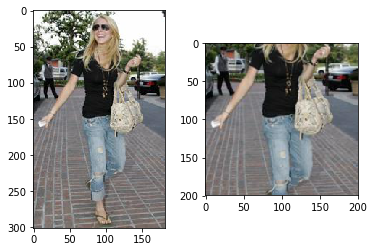

In [245]:
ax0 = plt.subplot(1,2,1)
ax0.imshow(imgOrig)

ax1 = plt.subplot(1,2,2)
ax1.imshow(imgResize)

In [246]:
#bb = [100,50,225,150]   # square shape
bb = [125,50,225,200]   # rectangular shape

In [247]:
imgCrop = imgOrig[bb[1]:bb[3],bb[0]:bb[2],:]
#imgCrop = pp.preprocess(imgCrop)

In [248]:
imgPatch = patches.Rectangle(xy=(bb[0],bb[1]),
                             width=bb[2]-bb[0],
                             height=bb[3]-bb[1],
                             fill=False,
                             linestyle='-',color='pink')

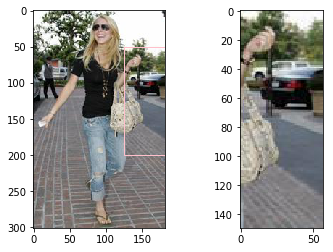

In [249]:
ax0 = plt.subplot(1,2,1)
ax0.add_patch(imgPatch)
ax0.imshow(imgOrig)

ax1 = plt.subplot(1,2,2)
ax1.imshow(imgCrop)

In [250]:
imgSquare = pp.pad_to_square(imgCrop)

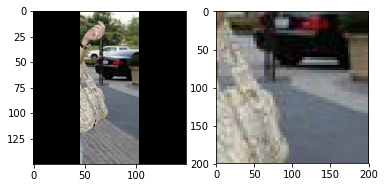

In [251]:
ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
ax0.imshow(imgSquare)
ax1.imshow(pp.preprocess(imgCrop))

In [252]:
w,h = imgOrig.shape[:2]
wBB,hBB = bb[2]-bb[0],bb[3]-bb[1]
dW = (hBB-wBB) // 2 if hBB > wBB else 0
dH = (wBB-hBB) // 2 if wBB > hBB else 0



In [253]:
cropBB = [max(bb[0]-dW,0),
          max(bb[1]-dH,0),
          min(bb[2]+dW,w),
          min(bb[3]+dH,h)]
cropBB          

[100, 50, 250, 182]

In [254]:
imgCropSquare = imgOrig[cropBB[1]:cropBB[3],cropBB[0]:cropBB[2],:]
#imgCrop = pp.preprocess(imgCrop)

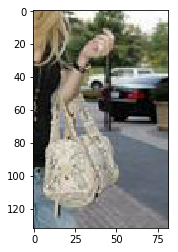

In [255]:
plt.imshow(imgCropSquare)

In [256]:
imgAdj=pp.preprocess(imgCropSquare)

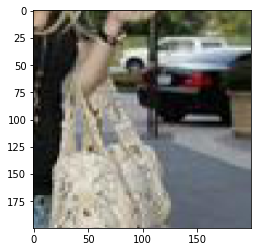

In [257]:
plt.imshow(imgAdj)

In [258]:
imgAdj.shape

(200, 200, 3)

In [259]:
imgAdj2 = pp.preprocess(imgOrig,crop_to_square=True,bbox=bb)

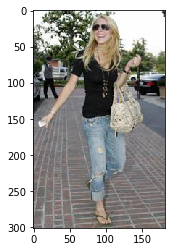

In [261]:
plt.imshow(imgAdj2)

In [262]:
help(plt.imsave)

Help on function imsave in module matplotlib.pyplot:

imsave(fname, arr, **kwargs)
    Save an array as in image file.
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    fname : str or file-like
        The filename or a Python file-like object to store the image in.
        The necessary output format is inferred from the filename extension
        but may be explicitly overwritten using *format*.
    arr : array-like
        The image data. The shape can be one of
        MxN (luminance), MxNx3 (RGB) or MxNx4 (RGBA).
    vmin, vmax : scalar, optional
        *vmin* and *vmax* set the color scaling for the image by fixing the
        values that map to the colormap color limits. If either *vmin*
        or *vmax* is None, that limit is determined from the *arr*
        min/max value.
    cmap : str or `~matplotlib.colors.Colormap`, optional
        A Colormap instance or registered colormap name. The colormap
        maps sca

---
# Crop, Resize, and Seperate Classes

- Reads original image + bbox
- Crops to bbox
- resizes to 
---